In [1]:
# Importing the required packages
import igraph as ig
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats

# Specifying the figure parameters
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
params = {'legend.fontsize': 16,
          'legend.handlelength': 2.}
plt.rcParams.update(params)

In [2]:
def results(iters= 3,pop=10000,edge_per_node= 2,days=170,m=8, power = 1,
            probs_inf=[0.01,0.01,0.1,0.2,0.3,0.3,0.3,0.25,0.2,0.15,0.1,0.05,0.01,0.01]):
    """stores the results of the SIR model for stats/plotting"""
    time_1perc_all = [] #time when 1% of the population is first infected
    tot_time_1perc_all = [] #total time for which 1% of the population is infected
    time_1hub_all = [] #time when the first hub is infected
    cl_coeffs_all = [] #clustering coefficient of network at each iteration
    S_final = []
    R_final = []
    I_final = []
    no_rm_all = []
    peak_time_all = []
    peak_perc_all = []
    for i in range(0,iters):
        time_1perc = False
        time_1hub = False
        tt = False
        tt_peak = False
        tot_time_1perc = 0.0
        I_stores = 0.0
        
        g = ig.Graph.Barabasi(pop, edge_per_node,power)
        g.vs["state"] = "S"
        g.vs["duration"] = 0
        i = rd.randint(0, pop-1)
        g.vs[i]["state"] = "I"
        
        for time in range(days): #no. of days
            if len(g.vs.select(state_eq = "I")) > pop*0.01 and time_1perc is False:
                #stores the time that 1% of the population is infected
                time_1perc = True
                tot_time_1perc = float(time)
                time_1perc_all.append(time)
            if len(g.vs.select(state_eq = "I")) < pop*0.01 and tot_time_1perc > 0.0 and tt is False:
                #stores the total time for which 1% of the population is infected
                tot_time = time - tot_time_1perc
                tot_time_1perc_all.append(tot_time)
                tt = True
                # stores the clustering coefficient associated with that time
                cl_coeff = g.transitivity_undirected()
                cl_coeffs_all.append(cl_coeff)
            for n in g.vs.select(state_eq = "I"): #iterates through each node in the network
                if g.vs[n.index]["duration"] == 0 and len(g.neighbors(n)) > m and time_1hub == False:
                    #stores the time that the first hub is infected
                    time_1hub = True
                    time_1hub_all.append(time)
                g.vs[n.index]["duration"] += 1 #from day 0 to infect_len this node continues to infect
                day_inf = g.vs[n.index]["duration"]
                for nb in g.neighbors(n): #iterates through neighbours of that node
                    if g.vs[nb]["state"] == "S": #if node is infected...
                        r = rd.random() #random state
                        if r < probs_inf[day_inf]:
                            g.vs[nb]["state"] = "I" #change state to infected
                if g.vs[n.index]["duration"] >= rd.randrange(2,14): #after infect_len that node changes to recovered
                    g.vs[n.index]["state"] = "R"
            if time == days-1:
                S_final.append(len(g.vs.select(state_eq = "S")))
                I_final.append(len(g.vs.select(state_eq = "I")))
                R_final.append(len(g.vs.select(state_eq = "R")))
            if time_1perc is True and I_stores > len(g.vs.select(state_eq = "I")) and tt_peak is False:
                # if pop greater than 1% and previous no. of infected nodes is higher than current assume peak
                tt_peak = True
                peak_time_all.append(time)
                peak_perc_all.append(I_stores)
            I_stores = len(g.vs.select(state_eq = "I"))
            

    return peak_time_all, peak_perc_all, cl_coeffs_all, tot_time_1perc_all, time_1perc_all, S_final, I_final,R_final



   

   

In [9]:
#Control_a = results(iters = 5000)
#Power_2_a = results(iters = 5000, power = 2)
#Power_3_a = results(iters = 5000, power = 3)
#Power_4_a = results(iters = 5000, power = 4)
#Power_5_a = results(iters = 5000, power = 5)
#Degree_3_a = results(iters = 5000, edge_per_node= 3)
#Degree_4_a = results(iters = 5000, edge_per_node= 4)
#Degree_5_a = results(iters = 5000, edge_per_node= 5)
Degree_6_a = results(iters = 5000, edge_per_node= 6)
#Lowpower_Highdegree_a = results(iters = 5000, power = 1, edge_per_node= 6)
#Highpower_Lowdegree_a = results(iters = 5000, power = 5, edge_per_node= 2)
#High_both_a = results(iters = 5000, edge_per_node= 6, power = 5)

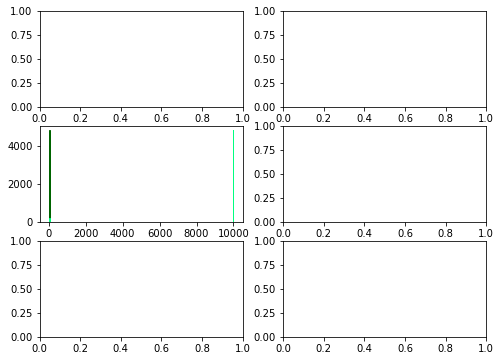

<Figure size 432x288 with 0 Axes>

In [18]:
# Histogram 

fig, [[ax1, ax2],[ax3, ax4], [ax5,ax6]] = plt.subplots(3,2,figsize=(8,6))

#ax1.hist(x= np.array(Control_a[5]), bins= 300, histtype='bar', color='red')
#ax1.hist(x= np.array(Control_a[7]), bins= 300, histtype='bar',color='salmon')

#ax2.hist(x= np.array(Power_5_a[5]), bins= 300, histtype='bar', color='darkgoldenrod')
#ax2.hist(x= np.array(Power_5_a[7]), bins= 300, histtype='bar',color='gold')

ax3.hist(x= np.array(Degree_6_a[5]), bins= 300,histtype='step', color='darkgreen')
ax3.hist(x= np.array(Degree_6_a[7]), bins= 300,histtype='step',color='springgreen')

#ax4.hist(x= np.array(Lowpower_Highdegree_a[5]), bins= 300, histtype='bar', color='darkblue')
#ax4.hist(x= np.array(Lowpower_Highdegree_a[7]), bins= 300, histtype='bar',color='lightskyblue')

#ax5.hist(x= np.array(Highpower_Lowdegree_a[5]), bins= 300, histtype='bar', color='darkmagenta')
#ax5.hist(x= np.array(Highpower_Lowdegree_a[7]), bins= 300, histtype='bar',color='plum')

#ax6.hist(x= np.array(High_both_a[5]), bins= 300, histtype='bar', color='saddlebrown')
#ax6.hist(x= np.array(High_both_a[7]), bins= 300, histtype='bar',color='sandybrown')



plt.tight_layout()
plt.show()